# Week 1 - Image Stacking
####  

In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import statistics
import time
import sys

In [3]:
# Loading .CSV files & FITS images in a list
data, image = [], []
for i in range(6):
    path = 'Data 1/data' + str(i) + '.csv'
    data.append(path)
    
for i in range(11):
    path = 'Data 1/image' + str(i) + '.fits'
    image.append(path)

### Mean & Median of a 1-D array

In [4]:
def calc_stats(file):
  data = np.loadtxt(file, delimiter=',')
  tup = []
  tup.append(np.round(np.mean(data),1))
  tup.append(np.round(np.median(data),1))
  return tuple(tup)

stats = calc_stats(data[0])
print(stats)

(11.4, 10.4)


###### 

### Mean of a set of signals

In [5]:
def mean_datasets(file):
  n = len(file)
  if n > 0:
    data = np.loadtxt(file[0], delimiter=',')
    for i in range(1,n):
      data += np.loadtxt(file[i], delimiter=',') 
    data_mean = data/n    
    return np.round(data_mean, 1)

print(mean_datasets([data[0], data[1], data[2]]))
print(mean_datasets([data[3], data[4], data[5]]))

[[11.  11.9 13. ]
 [ 9.5  6.8  9.4]
 [ 7.2 11.1 12.5]
 [ 8.8  7.3  9.2]
 [16.6 10.6 10.3]]
[[-2.9  2.6  0.6 -5.4]
 [-4.4 -0.7  0.7 -0.2]
 [-1.7  2.5 -8.7 -5.4]]


###### 

### Read a FITS file & Find position of the brightest pixel

(100, 100)


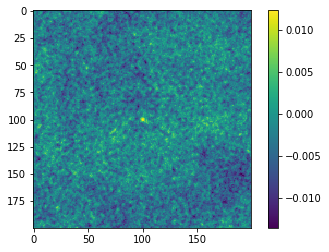

In [6]:
def load_fits(file):
  hdulist = fits.open(file)
  data = hdulist[0].data
  out = np.where(data == data.max())
  return (out[0][0],out[1][0])

bright = load_fits(image[0])
print(bright)

# Confirm your result visually
hdulist = fits.open(image[0])
data = hdulist[0].data

# Plot the 2D image data
plt.imshow(data.T, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()

###### 

### Mean Stacking a set of FITS files

Central Pixel Value -  0.014150320738554


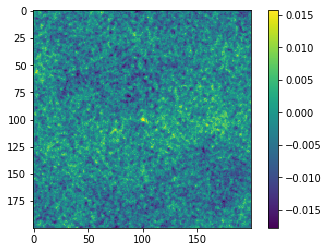

In [27]:
def mean_fits(lst):
  out = np.zeros((200,200))
  for i in range(len(lst)):
    hdulist = fits.open(lst[i])
    data = hdulist[0].data
    out[:,:] += data[:,:]
  out /= len(lst) 
  return out

# Test your function with examples from the question
data  = mean_fits([image[0], image[1], image[2], image[3], image[4]])
print('Central Pixel Value - ', data[100, 100])    

# Plot the result
plt.imshow(data.T, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()

###### 

### Timing statistics.mean & numpy.mean implementations

In [28]:
def time_stat(func, size, ntrials):
  sum = 0
  for i in range(ntrials):
    data = np.random.rand(size)
    start = time.perf_counter()
    res = func(data)
    seconds = time.perf_counter() - start
    # return the average run time
    sum += seconds
  sum /= ntrials
  return sum

print('{:.6f}s for statistics.mean'.format(time_stat(statistics.mean, 10**5, 10)))
print('{:.6f}s for np.mean'.format(time_stat(np.mean, 10**5, 1000)))

0.272857s for statistics.mean
0.000095s for np.mean


###### 

### Median Stacking a set of FITS files

In [33]:
def median_fits(lst):
  temp = np.zeros((len(lst),200,200))
  median = np.zeros((200,200))
  
  start = time.perf_counter()
  for i in range(len(lst)):
    hdulist = fits.open(lst[i])
    data = hdulist[0].data
    temp[i,:,:] = data
  for j in range(200):
    for k in range(200):
      median[j][k] = np.median(temp[:,j,k])
  end = time.perf_counter() - start
  
  memory = sys.getsizeof(temp)/1024
  return (median, end, memory)

print('Central Pixel Value  |   Time taken   |  Memory\n')

# Run your function with first example in the question.
result = median_fits([image[0], image[1]])
print(result[0][100, 100], result[1], result[2])      # Value at central pixel

# Run your function with second example in the question.
result = median_fits([image[i] for i in range(11)])
print(result[0][100, 100], result[1], result[2])

Central Pixel Value  |   Time taken   |  Memory

0.010775766335427761 2.235639400000082 625.125
0.011797304265201092 2.171277200000077 3437.625
